In [136]:
# Import standard libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import functools
import operator
from os import system
from IPython.display import Image
%matplotlib inline

# Import data preparation libraries
from matplotlib.cbook import boxplot_stats  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE 

# Import machine learning libraries
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

# Import model evaluation libraries
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;">  1. Import and warehouse data:

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;">  • Import all the given datasets and explore shape and size of each

In [137]:
# Import the data
data = pd.read_csv('TelcomCustomer-Churn.csv')

In [138]:
# Check size and shape of the data
print(data.size)
print(data.shape)

147903
(7043, 21)


<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;">  2. Data cleansing:

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"> • Data exploration

In [139]:
data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [140]:
# Check the data types of the data
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"> • Missing value treatment

In [141]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [142]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [144]:
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"> • Convert categorical attributes to continuous

In [145]:
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])
data['Partner'] = le.fit_transform(data['Partner'])
data['Dependents'] = le.fit_transform(data['Dependents'])
data['PhoneService'] = le.fit_transform(data['PhoneService'])
data['MultipleLines'] = le.fit_transform(data['MultipleLines'])
data['InternetService'] = le.fit_transform(data['InternetService'])
data['OnlineSecurity'] = le.fit_transform(data['OnlineSecurity'])
data['OnlineBackup'] = le.fit_transform(data['OnlineBackup'])
data['DeviceProtection'] = le.fit_transform(data['DeviceProtection'])
data['TechSupport'] = le.fit_transform(data['TechSupport'])
data['StreamingTV'] = le.fit_transform(data['StreamingTV'])
data['StreamingMovies'] = le.fit_transform(data['StreamingMovies'])
data['Contract'] = le.fit_transform(data['Contract'])
data['PaperlessBilling'] = le.fit_transform(data['PaperlessBilling'])
data['PaymentMethod'] = le.fit_transform(data['PaymentMethod'])
data['TotalCharges'] = le.fit_transform(data['TotalCharges'])
data['Churn'] = le.fit_transform(data['Churn'])

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"> • Drop irrelavant attributes

We drop the 'customerID' as it has one-to-one mapping.

In [146]:
data = data.drop('customerID',axis=1)

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;">  3. Data analysis & visualisation

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"> • Perform detailed statistical analysis on the data• Perform detailed statistical analysis on the data

In [147]:
data.describe()

gender  SeniorCitizen      Partner   Dependents       tenure  \
count  7043.000000    7043.000000  7043.000000  7043.000000  7043.000000   
mean      0.504756       0.162147     0.483033     0.299588    32.371149   
std       0.500013       0.368612     0.499748     0.458110    24.559481   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       0.000000     0.000000     0.000000     9.000000   
50%       1.000000       0.000000     0.000000     0.000000    29.000000   
75%       1.000000       0.000000     1.000000     1.000000    55.000000   
max       1.000000       1.000000     1.000000     1.000000    72.000000   

       PhoneService  MultipleLines  InternetService  OnlineSecurity  \
count   7043.000000    7043.000000      7043.000000     7043.000000   
mean       0.903166       0.940508         0.872923        0.790004   
std        0.295752       0.948554         0.737796        0.859848   
min        0.000000       0.000000         0.000000        0.000000   
25%        1.000000       0.000000         0.000000        0.000000   
50%        1.000000       1.000000         1.000000        1.000000   
75%        1.000000       2.000000         1.000000        2.000000   
max        1.000000       2.000000         2.000000        2.000000   

       OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
count   7043.000000       7043.000000  7043.000000  7043.000000   
mean       0.906432          0.904444     0.797104     0.985376   
std        0.880162          0.879949     0.861551     0.885002   
min        0.000000          0.000000     0.000000     0.000000   
25%        0.000000          0.000000     0.000000     0.000000   
50%        1.000000          1.000000     1.000000     1.000000   
75%        2.000000          2.000000     2.000000     2.000000   
max        2.000000          2.000000     2.000000     2.000000   

       StreamingMovies     Contract  PaperlessBilling  PaymentMethod  \
count      7043.000000  7043.000000       7043.000000    7043.000000   
mean          0.992475     0.690473          0.592219       1.574329   
std           0.885091     0.833755          0.491457       1.068104   
min           0.000000     0.000000          0.000000       0.000000   
25%           0.000000     0.000000          0.000000       1.000000   
50%           1.000000     0.000000          1.000000       2.000000   
75%           2.000000     1.000000          1.000000       2.000000   
max           2.000000     2.000000          1.000000       3.000000   

       MonthlyCharges  TotalCharges        Churn  
count     7043.000000   7043.000000  7043.000000  
mean        64.761692   3257.794122     0.265370  
std         30.090047   1888.693496     0.441561  
min         18.250000      0.000000     0.000000  
25%         35.500000   1609.000000     0.000000  
50%         70.350000   3249.000000     0.000000  
75%         89.850000   4901.500000     1.000000  
max        118.750000   6530.000000     1.000000

In [148]:
data.corr().style.background_gradient(cmap='BuGn')

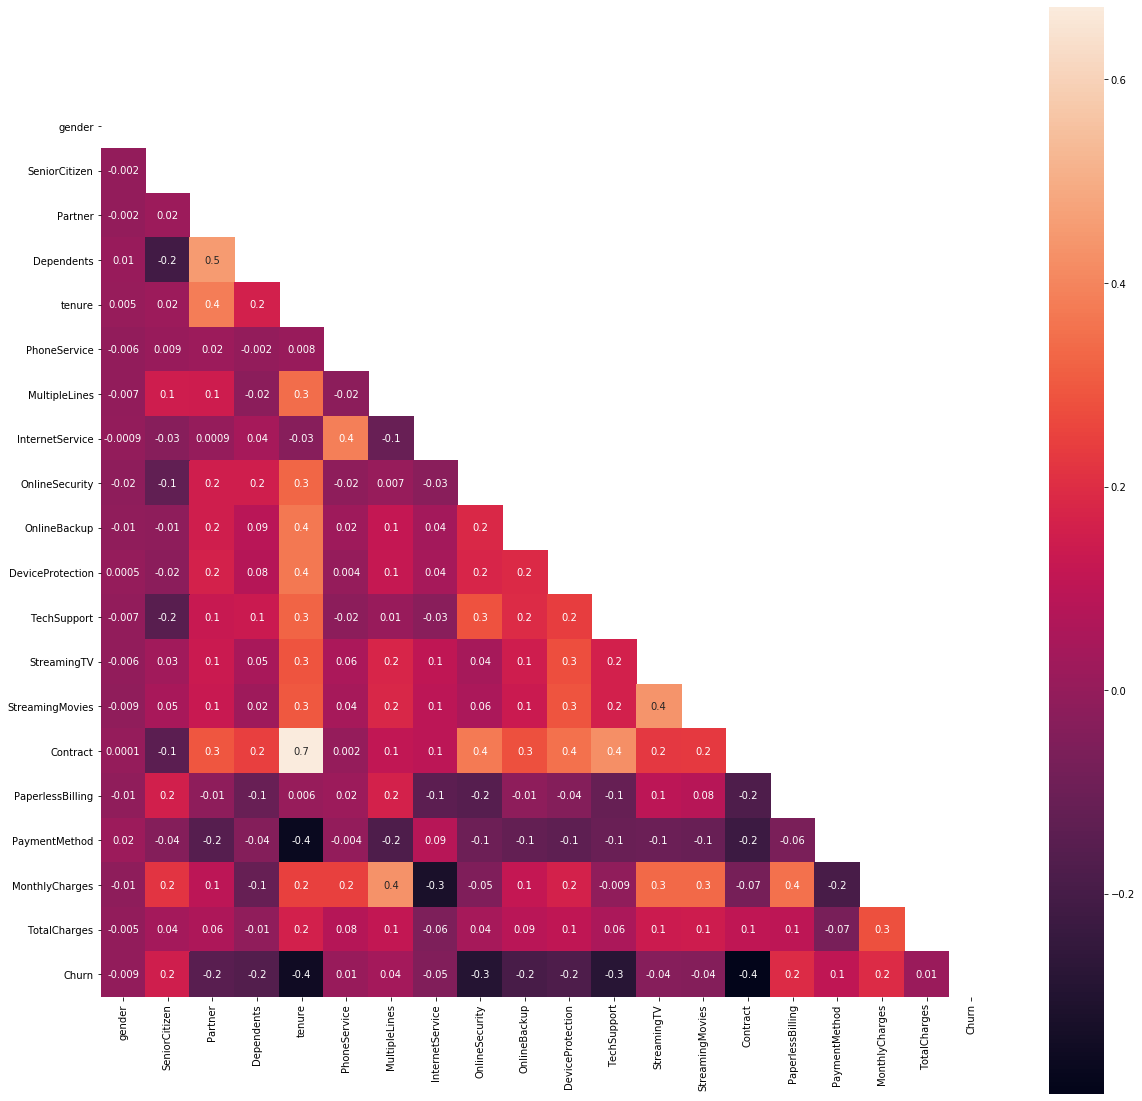

In [149]:
fig, ax = plt.subplots(figsize=(20,20)) 
matrix = np.triu(data.corr())
sns.heatmap(data.corr(),annot = True,fmt='.1g',square=True,mask=matrix,ax = ax)

1. It looks like the target variable 'Churn' has negative correlation with more variables. 
2. The target variable has strong negative correlation with 'tenure' and 'Contract'. This suggests that the people who has longer relationship or a commited relationship are likely to retain with the network.
3. Among the positive correlations, 'SeniorCitizen', 'PaperlessBilling' and 'MonthlyCharges' have equal coefficients. This does not suggest much, however, people with higher monthly charges are likely to change the network.

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"> • Perform a detailed univariate, bivariate and multivariate analysis

In [150]:
mean_tenure_opted = np.mean(data['tenure'][data['Churn']==1])
mean_tenure_not_opted = np.mean(data['tenure'][data['Churn']==0])

count_tenure_opted_less_than_mean = data['tenure'][(data['tenure']<mean_tenure_opted) & (data['Churn']==1)].count()
count_tenure_opted_greater_than_mean = data['tenure'][(data['tenure']>mean_tenure_opted) & (data['Churn']==1)].count()
per_tenure_opted_less_than_mean = round(count_tenure_opted_less_than_mean/(count_tenure_opted_less_than_mean+count_tenure_opted_greater_than_mean)*100,2)
per_tenure_opted_greater_than_mean = round(count_tenure_opted_greater_than_mean/(count_tenure_opted_less_than_mean+count_tenure_opted_greater_than_mean)*100,2)

count_tenure_not_opted_less_than_mean = data['tenure'][(data['tenure']<mean_tenure_not_opted) & (data['Churn']==0)].count()
count_tenure_not_opted_greater_than_mean = data['tenure'][(data['tenure']>mean_tenure_not_opted) & (data['Churn']==0)].count()
per_tenure_not_opted_less_than_mean = round(count_tenure_not_opted_less_than_mean/(count_tenure_not_opted_less_than_mean+count_tenure_not_opted_greater_than_mean)*100,2)
per_tenure_not_opted_greater_than_mean = round(count_tenure_not_opted_greater_than_mean/(count_tenure_not_opted_less_than_mean+count_tenure_not_opted_greater_than_mean)*100,2)


####
median_tenure_opted = np.median(data['tenure'][data['Churn']==1])
median_tenure_not_opted = np.median(data['tenure'][data['Churn']==0])

df_temp = pd.DataFrame({'Mean':[mean_tenure_opted,mean_tenure_not_opted],
                       'Count_less_than_mean':[str(count_tenure_opted_less_than_mean)+' (' + str(per_tenure_opted_less_than_mean)+'%)',str(count_tenure_not_opted_less_than_mean)+' (' + str(per_tenure_not_opted_less_than_mean)+'%)'],
                       'Count_greater_than_mean':[str(count_tenure_opted_greater_than_mean)+' (' + str(per_tenure_opted_greater_than_mean)+'%)',str(count_tenure_not_opted_greater_than_mean)+' (' + str(per_tenure_not_opted_greater_than_mean)+'%)'],
                       'Median':[median_tenure_opted,median_tenure_not_opted]},index=['Not opted','Opted'])
df_temp

Mean Count_less_than_mean Count_greater_than_mean  Median
Not opted  17.979133        1190 (63.67%)            679 (36.33%)    10.0
Opted      37.569965        2581 (49.88%)           2593 (50.12%)    38.0

In [151]:
mean_MonthlyCharges_opted = np.mean(data['MonthlyCharges'][data['Churn']==1])
mean_MonthlyCharges_not_opted = np.mean(data['MonthlyCharges'][data['Churn']==0])

count_MonthlyCharges_opted_less_than_mean = data['MonthlyCharges'][(data['MonthlyCharges']<mean_MonthlyCharges_opted) & (data['Churn']==1)].count()
count_MonthlyCharges_opted_greater_than_mean = data['MonthlyCharges'][(data['MonthlyCharges']>mean_MonthlyCharges_opted) & (data['Churn']==1)].count()
per_MonthlyCharges_opted_less_than_mean = round(count_MonthlyCharges_opted_less_than_mean/(count_MonthlyCharges_opted_less_than_mean+count_MonthlyCharges_opted_greater_than_mean)*100,2)
per_MonthlyCharges_opted_greater_than_mean = round(count_MonthlyCharges_opted_greater_than_mean/(count_MonthlyCharges_opted_less_than_mean+count_MonthlyCharges_opted_greater_than_mean)*100,2)


count_MonthlyCharges_not_opted_less_than_mean = data['MonthlyCharges'][(data['MonthlyCharges']<mean_MonthlyCharges_not_opted) & (data['Churn']==0)].count()
count_MonthlyCharges_not_opted_greater_than_mean = data['MonthlyCharges'][(data['MonthlyCharges']>mean_MonthlyCharges_not_opted) & (data['Churn']==0)].count()
per_MonthlyCharges_not_opted_less_than_mean = round(count_MonthlyCharges_not_opted_less_than_mean/(count_MonthlyCharges_not_opted_less_than_mean+count_MonthlyCharges_not_opted_greater_than_mean)*100,2)
per_MonthlyCharges_not_opted_greater_than_mean = round(count_MonthlyCharges_not_opted_greater_than_mean/(count_MonthlyCharges_not_opted_less_than_mean+count_MonthlyCharges_not_opted_greater_than_mean)*100,2)


####
median_MonthlyCharges_opted = np.median(data['MonthlyCharges'][data['Churn']==1])
median_MonthlyCharges_not_opted = np.median(data['MonthlyCharges'][data['Churn']==0])


df_temp = pd.DataFrame({'Mean':[mean_MonthlyCharges_opted,mean_MonthlyCharges_not_opted],
                       'Count_less_than_mean':[str(count_MonthlyCharges_opted_less_than_mean)+' (' + str(per_MonthlyCharges_opted_less_than_mean)+'%)',str(count_MonthlyCharges_not_opted_less_than_mean)+' (' + str(per_MonthlyCharges_not_opted_less_than_mean)+'%)'],
                       'Count_greater_than_mean':[str(count_MonthlyCharges_opted_greater_than_mean)+' (' + str(per_MonthlyCharges_opted_greater_than_mean)+'%)',str(count_MonthlyCharges_not_opted_greater_than_mean)+' (' + str(per_MonthlyCharges_not_opted_greater_than_mean)+'%)'],
                       'Median':[median_MonthlyCharges_opted,median_MonthlyCharges_not_opted]},index=['Not opted','Opted'])
df_temp

Mean Count_less_than_mean Count_greater_than_mean  Median
Not opted  74.441332         743 (39.75%)           1126 (60.25%)  79.650
Opted      61.265124        2492 (48.16%)           2682 (51.84%)  64.425

In [152]:
mean_TotalCharges_opted = np.mean(data['TotalCharges'][data['Churn']==1])
mean_TotalCharges_not_opted = np.mean(data['TotalCharges'][data['Churn']==0])

count_TotalCharges_opted_less_than_mean = data['TotalCharges'][(data['TotalCharges']<mean_TotalCharges_opted) & (data['Churn']==1)].count()
count_TotalCharges_opted_greater_than_mean = data['TotalCharges'][(data['TotalCharges']>mean_TotalCharges_opted) & (data['Churn']==1)].count()
per_TotalCharges_opted_less_than_mean = round(count_TotalCharges_opted_less_than_mean/(count_TotalCharges_opted_less_than_mean+count_TotalCharges_opted_greater_than_mean)*100,2)
per_TotalCharges_opted_greater_than_mean = round(count_TotalCharges_opted_greater_than_mean/(count_TotalCharges_opted_less_than_mean+count_TotalCharges_opted_greater_than_mean)*100,2)

count_TotalCharges_not_opted_less_than_mean = data['TotalCharges'][(data['TotalCharges']<mean_TotalCharges_not_opted) & (data['Churn']==0)].count()
count_TotalCharges_not_opted_greater_than_mean = data['TotalCharges'][(data['TotalCharges']>mean_TotalCharges_not_opted) & (data['Churn']==0)].count()
per_TotalCharges_not_opted_less_than_mean = round(count_TotalCharges_not_opted_less_than_mean/(count_TotalCharges_not_opted_less_than_mean+count_TotalCharges_not_opted_greater_than_mean)*100,2)
per_TotalCharges_not_opted_greater_than_mean = round(count_TotalCharges_not_opted_greater_than_mean/(count_TotalCharges_not_opted_less_than_mean+count_TotalCharges_not_opted_greater_than_mean)*100,2)


####
median_TotalCharges_opted = np.median(data['TotalCharges'][data['Churn']==1])
median_TotalCharges_not_opted = np.median(data['TotalCharges'][data['Churn']==0])

df_temp = pd.DataFrame({'Mean':[mean_TotalCharges_opted,mean_TotalCharges_not_opted],
                       'Count_less_than_mean':[str(count_TotalCharges_opted_less_than_mean)+' (' + str(per_TotalCharges_opted_less_than_mean)+'%)',str(count_TotalCharges_not_opted_less_than_mean)+' (' + str(per_TotalCharges_not_opted_less_than_mean)+'%)'],
                       'Count_greater_than_mean':[str(count_TotalCharges_opted_greater_than_mean)+' (' + str(per_TotalCharges_opted_greater_than_mean)+'%)',str(count_TotalCharges_not_opted_greater_than_mean)+' (' + str(per_TotalCharges_not_opted_greater_than_mean)+'%)'],
                       'Median':[median_TotalCharges_opted,median_TotalCharges_not_opted]},index=['Not opted','Opted'])
df_temp

Mean Count_less_than_mean Count_greater_than_mean  Median
Not opted  3303.29053         969 (51.85%)            900 (48.15%)  3131.0
Opted      3241.35949        2554 (49.36%)           2620 (50.64%)  3278.5

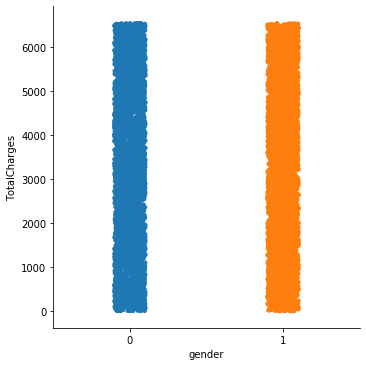

In [153]:
sns.catplot(x="gender", y="TotalCharges", data=data)

1. It can be observed that there is no difference in gender regarding charges.
2. Also, we do not observe any considerable gender bias in the data.

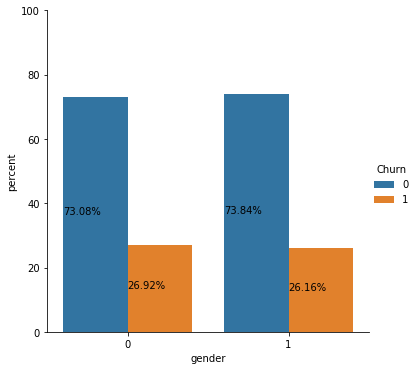

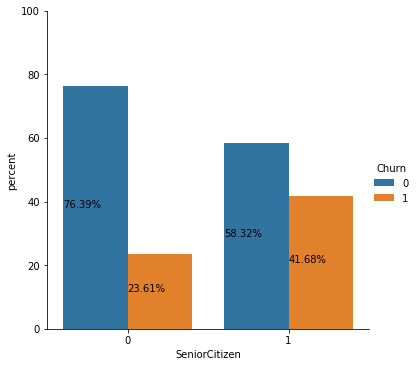

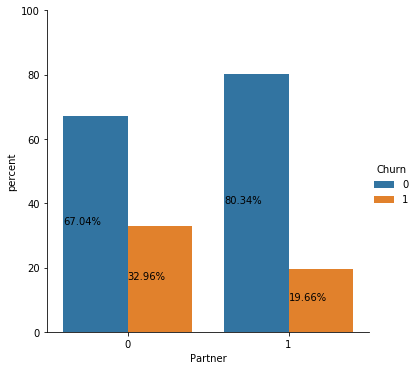

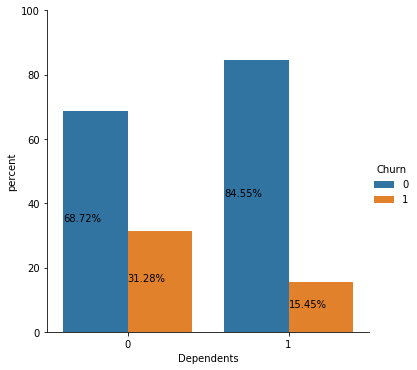

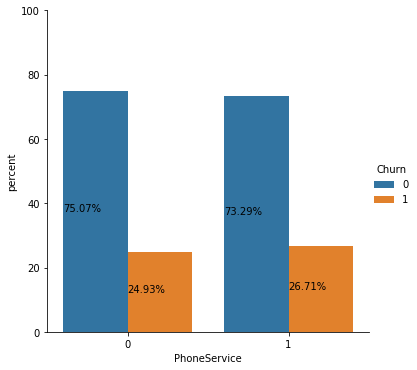

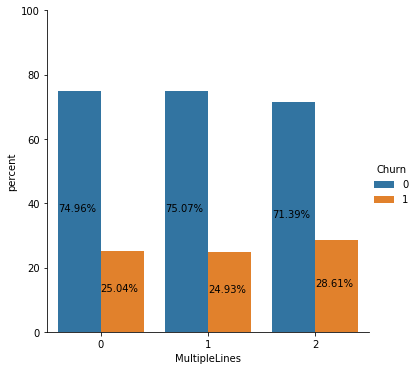

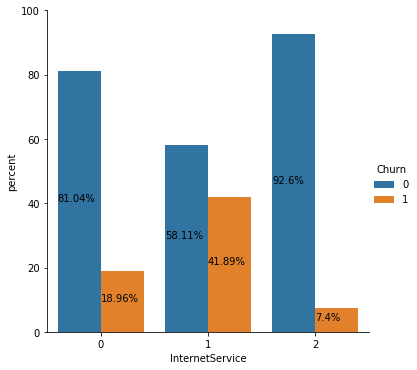

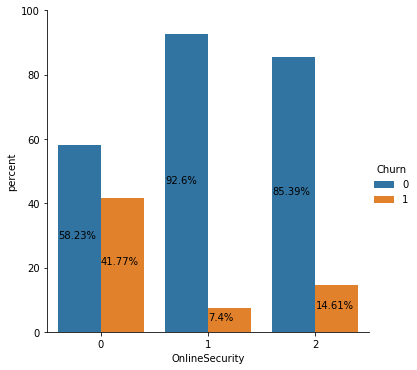

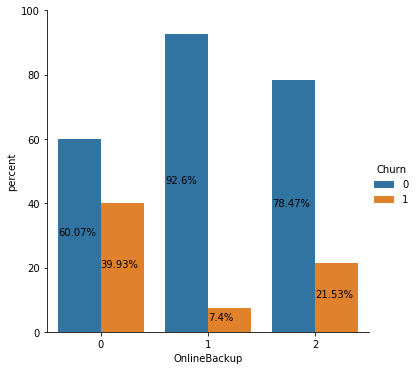

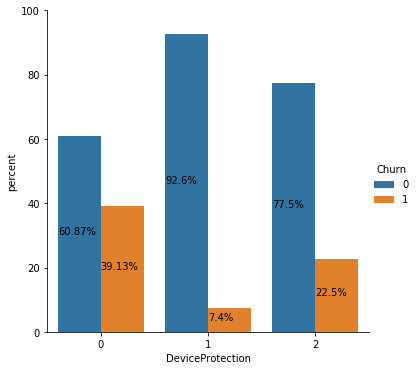

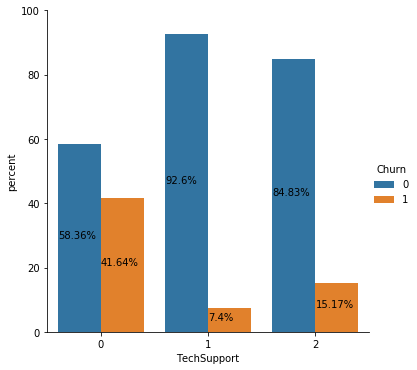

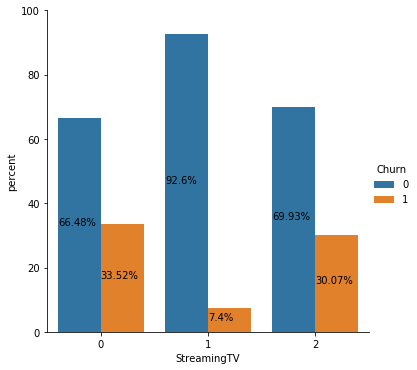

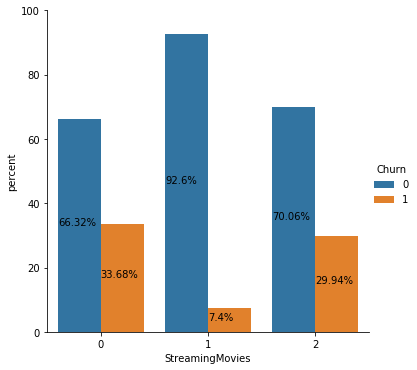

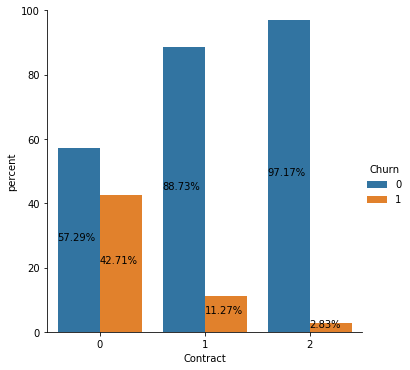

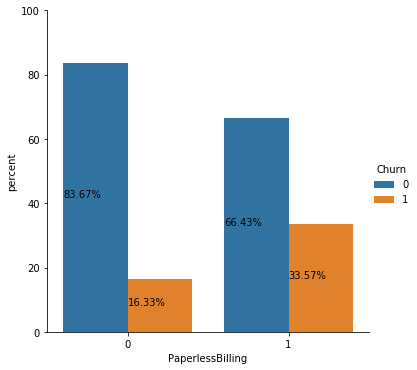

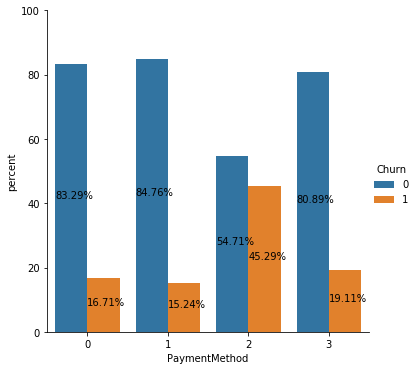

In [154]:
cols_for_graphs = ['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity',
                   'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling',
                   'PaymentMethod']


for columms in cols_for_graphs:
    int_serv_per = data.groupby(columms)['Churn'].value_counts(normalize=True)
    int_serv_per = int_serv_per.mul(100)
    int_serv_per = int_serv_per.rename('percent').reset_index()

    g = sns.catplot(x=columms,y='percent',hue='Churn',kind='bar',data=int_serv_per)
    g.ax.set_ylim(0,100)

    for p in g.ax.patches:
        anot = str(p.get_height().round(2)) + '%'
        anot_pos_x = p.get_x() 
        anot_pos_y = p.get_height()
        g.ax.text(anot_pos_x,anot_pos_y/2,anot)

##### Observations:
    
1. No_internet_service was observed in 4-5 colums

2. If internet service is "Fiber optics" there is high chance of churn

3. If Online security is "NO" there is high chance of churn

4. If Online_backup is "NO" there is high chance of churn

5. If DeviceProtection is "NO" there is high chance of churn

6. If TechSupport is "NO" there is high chance of churn

7. If there is month-to-onth contract, there is high chance of churn

8. If PaperlessBilling is "YES" there is high chance of churn

9. If PaymentMethod is "Electronic check" there is high chance of churn

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;">  4. Data pre-processing:

In [155]:
# Scaling the continuous varibales
scaler = StandardScaler() #MinMaxScaler()

data[['tenure']] = scaler.fit_transform(data[['tenure']])
data[['MonthlyCharges']] = scaler.fit_transform(data[['MonthlyCharges']])
data[['TotalCharges']] = scaler.fit_transform(data[['TotalCharges']])

data.head()

gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0       0              0        1           0 -1.277445             0   
1       1              0        0           0  0.066327             1   
2       1              0        0           0 -1.236724             1   
3       1              0        0           0  0.514251             0   
4       0              0        0           0 -1.236724             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2       -1.160323     -0.398608      0  
1                 0              3       -0.259629     -0.948762      0  
2                 1              3       -0.362660     -1.641883      1  
3                 0              0       -0.746535     -0.983710      0  
4                 1              2        0.197365     -1.235224      1

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"> • Segregate predictors vs target attributes

In [156]:
X = data.drop(labels='Churn',axis=1)
y = data['Churn']

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"> • Check for target balancing

In [157]:
print(y.value_counts())

0    5174
1    1869
Name: Churn, dtype: int64


We will perform the target balancing in the later sections.

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"> • Perform train-test split

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;">  5. Model training, testing and tuning

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> • Decision tree classifier:

In [159]:
# creating a decision tree classifier
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)
print(dTree.score(X_train, y_train))
dTree.score(X_test, y_test)

0.9980475683351083


0.7310149041873669

In [160]:
# Visualization
train_char_label = ['No', 'Yes']
churn_tree_file = open('churn_tree.dot','w')
dot_data = tree.export_graphviz(dTree, out_file=churn_tree_file, feature_names = list(X_train), class_names = list(train_char_label))
churn_tree_file.close()

return_code = system("dot -Tpng churn_tree.dot -o churn_tree.png")
if(return_code>0):
    print("system command returning error: "+str(return_code))
else:
    display(Image("churn_tree.png"))

In [161]:
# Find the optimum depth
score = []
depth_test = range(1,10)

for i in depth_test:
    dTreeR_temp = DecisionTreeClassifier(criterion = 'gini', max_depth = i, random_state=1)
    dTreeR_temp.fit(X_train, y_train)
    score.append(dTreeR_temp.score(X_test, y_test))
    
print(score)
depth_test[score.index(max(score))]

[0.7530163236337828, 0.7530163236337828, 0.7963094393186657, 0.7856635911994322, 0.8041163946061036, 0.794889992902768, 0.7906316536550745, 0.7920511000709723, 0.7771469127040455]


5

We observe that the optimum depth is 5.

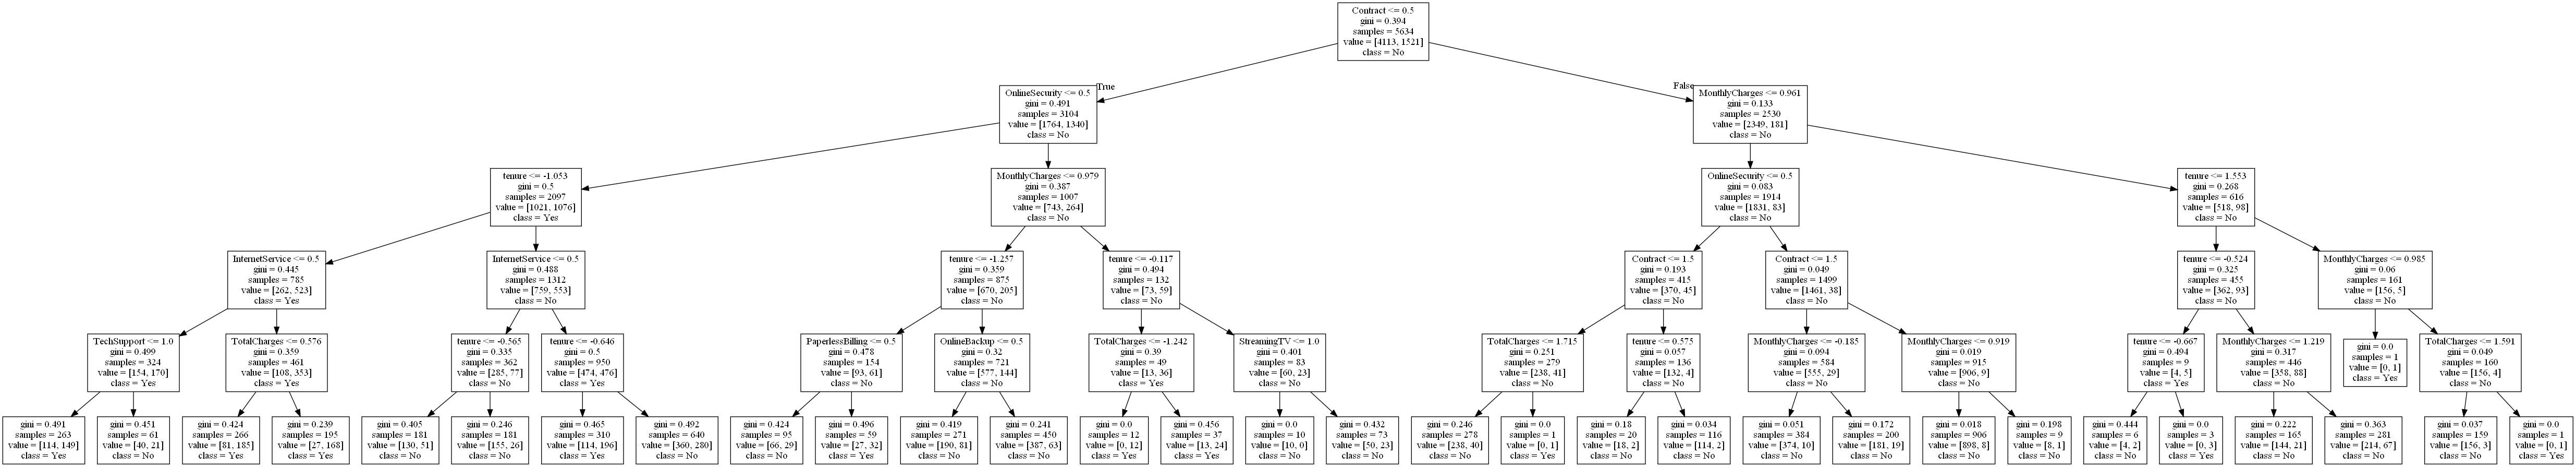

In [162]:
# Regularize the decision tree classifier
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = depth_test[score.index(max(score))], random_state=1)
dTreeR.fit(X_train, y_train)
score.append(dTreeR_temp.score(X_test, y_test))
    
train_char_label = ['No', 'Yes']
churn_tree_file = open('churn_tree.dot','w')
dot_data = tree.export_graphviz(dTreeR, out_file=churn_tree_file, feature_names = list(X_train), class_names = list(train_char_label))
churn_tree_file.close()

return_code = system("dot -Tpng churn_tree.dot -o churn_tree.png")
if(return_code>0):
    print("system command returning error: "+str(return_code))
else:
    display(Image("churn_tree.png"))

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> • Ensemble technique - Bagging:

In [163]:
# creating a bagging classifier
bg_clsf = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
bg_clsf.fit(X_train, y_train)
y_pred = bg_clsf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1061
           1       0.64      0.56      0.60       348

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.81      0.81      0.81      1409



In [164]:
# Performimg grid search CV on the Bagging classifier
hyperparameters = {"n_estimators" : range(50, 400, 50),"max_samples":range(1, 20, 1)}
grid_search_bg = GridSearchCV(BaggingClassifier(),hyperparameters,n_jobs=4,scoring="accuracy",cv=3)
best_bg_model = grid_search_bg.fit(X_train,y_train)
bg_clsf_best = best_bg_model.best_estimator_
bg_clsf_best.fit(X_train, y_train)
print(bg_clsf_best)
y_pred_best_bg = bg_clsf_best.predict(X_test)
print(classification_report(y_test, y_pred_best_bg))

BaggingClassifier(max_samples=18, n_estimators=300)
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1061
           1       0.66      0.43      0.52       348

    accuracy                           0.80      1409
   macro avg       0.74      0.68      0.70      1409
weighted avg       0.79      0.80      0.79      1409



We can observe that there is no improvement in the accuracy. So, we already have the best bagging classifier.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> • Ensemble technique - AdaBoosting:

In [165]:
# creating a AdaBoosting classifier
ad_clsf = AdaBoostClassifier(n_estimators=100)
ad_clsf.fit(X_train, y_train)
y_pred = ad_clsf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1061
           1       0.62      0.55      0.59       348

    accuracy                           0.81      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



In [166]:
# Performimg grid search CV on the AdaBoosting classifier
hyperparameters = {"learning_rate" : np.arange(0.0, 1.0, 0.1),"n_estimators" : range(50, 400, 50)}
grid_search_ad = GridSearchCV(AdaBoostClassifier(),hyperparameters,n_jobs=4,scoring="accuracy",cv=3)
best_ad_model = grid_search_ad.fit(X_train,y_train)
ad_clsf_best = best_ad_model.best_estimator_
ad_clsf_best.fit(X_train, y_train)
print(ad_clsf_best)
y_pred_best_ad = ad_clsf_best.predict(X_test)
print(classification_report(y_test, y_pred_best_ad))

AdaBoostClassifier(learning_rate=0.30000000000000004)
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1061
           1       0.62      0.54      0.58       348

    accuracy                           0.81      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



Similarly in the previous case, there is no improvement in the accuracy after tuning the hyperparameters.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> • Ensemble technique - XGBoosting:

In [167]:
# creating a XGB classifier
xg_clsf = XGBClassifier(max_depth=10, n_estimators=100)
xg_clsf.fit(X_train, y_train)
y_pred = xg_clsf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1061
           1       0.63      0.57      0.60       348

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.81      0.81      0.81      1409



In [168]:
# Performimg grid search CV on the XGBoosting classifier
hyperparameters = {"max_depth":[ 3, 4, 5, 6, 8, 10, 12, 15],"n_estimators" : range(50, 400, 50)}
grid_search_xgb = GridSearchCV(XGBClassifier(),hyperparameters,n_jobs=4,scoring="accuracy",cv=3)
best_xgb_model = grid_search_xgb.fit(X_train,y_train)

xg_clsf_best = best_xgb_model.best_estimator_
xg_clsf_best.fit(X_train, y_train)
print(xg_clsf_best)
y_pred_best_xg = xg_clsf_best.predict(X_test)
print(classification_report(y_test, y_pred_best_xg))

XGBClassifier(max_depth=4, n_estimators=50)
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      1061
           1       0.65      0.58      0.61       348

    accuracy                           0.82      1409
   macro avg       0.76      0.74      0.75      1409
weighted avg       0.81      0.82      0.82      1409



We can observe that the best XGBoosting model is obtainf for max_depth=4, n_estimators=50 with 1% increase in the accuracy than the previous one.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> • Ensemble technique - Random forest:

In [169]:
# creating a RF classifier
rf_clsf = RandomForestClassifier(max_depth=10,n_estimators = 100)  
rf_clsf.fit(X_train, y_train)
y_pred = rf_clsf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88      1061
           1       0.65      0.58      0.61       348

    accuracy                           0.82      1409
   macro avg       0.76      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



In [170]:
hyperparameters = {"max_depth":[ 3, 4, 5, 6, 8, 10, 12, 15],"n_estimators" : range(50, 400, 50)}
grid_search_rf = GridSearchCV(RandomForestClassifier(),hyperparameters,n_jobs=4,scoring="accuracy",cv=3)
best_rf_model = grid_search_rf.fit(X_train,y_train)

rf_clsf_best = best_rf_model.best_estimator_
rf_clsf_best.fit(X_train, y_train)
print(rf_clsf_best)
y_pred_best_rf = rf_clsf_best.predict(X_test)
print(classification_report(y_test, y_pred_best_rf))

RandomForestClassifier(max_depth=6, n_estimators=50)
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1061
           1       0.65      0.53      0.58       348

    accuracy                           0.81      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.80      0.81      0.81      1409



1. From the above models, we can observe that the difference in the accuracy of the models based on considered ensmble technique is very less. 
2. However, the random forest classifier achieved better accuracy of 82% than the other models.

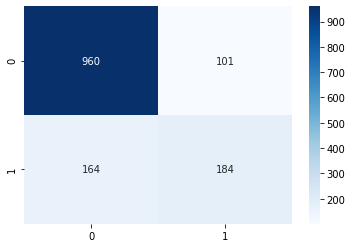

In [171]:
conf_mat = metrics.confusion_matrix(y_test,y_pred_best_rf)
df_conf_mat = pd.DataFrame(conf_mat)
sns.heatmap(df_conf_mat,annot=True,cmap='Blues',fmt='g')

From the confusion matrix we can say that:
1. True Positives (TP): we correctly predicted that they took loan are 193
2. True Negatives (TN): we correctly predicted that they they did not take loan are 956
3. False Positives (FP): we incorrectly predicted that they they took loan are 105 - Type I error
4. False Negatives (FN): we incorrectly predicted that they they did not took loan are 155 - Type II error

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> • Performing target balancing:

In [173]:
smote = SMOTE(random_state = 14)
X_train, y_train = smote.fit_resample(X_train, y_train)
print(y_train.value_counts())

1    4113
0    4113
Name: Churn, dtype: int64


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> • Decision tree classifier:

In [174]:
# creating a decision tree classifier
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)
print(dTree.score(X_train, y_train))
dTree.score(X_test, y_test)

0.9986627765621201


0.7374024130589071

In [175]:
# Visualization
train_char_label = ['No', 'Yes']
churn_tree_file = open('churn_tree.dot','w')
dot_data = tree.export_graphviz(dTree, out_file=churn_tree_file, feature_names = list(X_train), class_names = list(train_char_label))
churn_tree_file.close()

return_code = system("dot -Tpng churn_tree.dot -o churn_tree.png")
if(return_code>0):
    print("system command returning error: "+str(return_code))
else:
    display(Image("churn_tree.png"))

In [176]:
# Find the optimum depth
score = []
depth_test = range(1,10)

for i in depth_test:
    dTreeR_temp = DecisionTreeClassifier(criterion = 'gini', max_depth = i, random_state=1)
    dTreeR_temp.fit(X_train, y_train)
    score.append(dTreeR_temp.score(X_test, y_test))
    
print(score)
depth_test[score.index(max(score))]

[0.6529453513129879, 0.7530163236337828, 0.6898509581263307, 0.7416607523066004, 0.7402413058907026, 0.7409510290986515, 0.7274662881476224, 0.7224982256919801, 0.7324343506032647]


2

We observe that the optimum depth after the target balancing is 2. However, the accuracy is decreased.

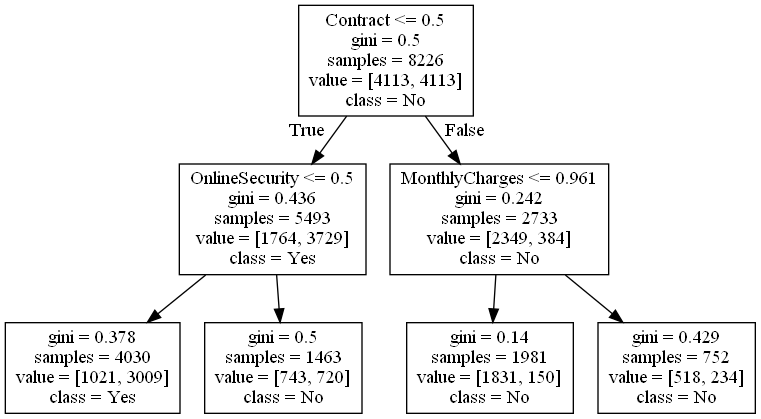

In [177]:
# Regularize the decision tree classifier
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = depth_test[score.index(max(score))], random_state=1)
dTreeR.fit(X_train, y_train)
score.append(dTreeR_temp.score(X_test, y_test))
    
train_char_label = ['No', 'Yes']
churn_tree_file = open('churn_tree.dot','w')
dot_data = tree.export_graphviz(dTreeR, out_file=churn_tree_file, feature_names = list(X_train), class_names = list(train_char_label))
churn_tree_file.close()

return_code = system("dot -Tpng churn_tree.dot -o churn_tree.png")
if(return_code>0):
    print("system command returning error: "+str(return_code))
else:
    display(Image("churn_tree.png"))

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> • Ensemble technique - Bagging:

In [178]:
# creating a bagging classifier
bg_clsf = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
bg_clsf.fit(X_train, y_train)
y_pred = bg_clsf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85      1061
           1       0.56      0.69      0.62       348

    accuracy                           0.79      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.81      0.79      0.79      1409



In [179]:
# Performimg grid search CV on the Bagging classifier
hyperparameters = {"n_estimators" : range(50, 400, 50),"max_samples":range(1, 20, 1)}
grid_search_bg = GridSearchCV(BaggingClassifier(),hyperparameters,n_jobs=4,scoring="accuracy",cv=3)
best_bg_model = grid_search_bg.fit(X_train,y_train)
bg_clsf_best = best_bg_model.best_estimator_
bg_clsf_best.fit(X_train, y_train)
print(bg_clsf_best)
y_pred_best_bg = bg_clsf_best.predict(X_test)
print(classification_report(y_test, y_pred_best_bg))

BaggingClassifier(max_samples=15, n_estimators=350)
              precision    recall  f1-score   support

           0       0.93      0.72      0.81      1061
           1       0.50      0.83      0.62       348

    accuracy                           0.75      1409
   macro avg       0.71      0.78      0.72      1409
weighted avg       0.82      0.75      0.77      1409



We can observe that there is no improvement in the accuracy.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> • Ensemble technique - AdaBoosting:

In [180]:
# creating a AdaBoosting classifier
ad_clsf = AdaBoostClassifier(n_estimators=100)
ad_clsf.fit(X_train, y_train)
y_pred = ad_clsf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.74      0.81      1061
           1       0.49      0.78      0.61       348

    accuracy                           0.75      1409
   macro avg       0.70      0.76      0.71      1409
weighted avg       0.81      0.75      0.76      1409



In [181]:
# Performimg grid search CV on the AdaBoosting classifier
hyperparameters = {"learning_rate" : np.arange(0.0, 1.0, 0.1),"n_estimators" : range(50, 400, 50)}
grid_search_ad = GridSearchCV(AdaBoostClassifier(),hyperparameters,n_jobs=4,scoring="accuracy",cv=3)
best_ad_model = grid_search_ad.fit(X_train,y_train)
ad_clsf_best = best_ad_model.best_estimator_
ad_clsf_best.fit(X_train, y_train)
print(ad_clsf_best)
y_pred_best_ad = ad_clsf_best.predict(X_test)
print(classification_report(y_test, y_pred_best_ad))

AdaBoostClassifier(learning_rate=0.7000000000000001, n_estimators=350)
              precision    recall  f1-score   support

           0       0.92      0.75      0.82      1061
           1       0.51      0.79      0.62       348

    accuracy                           0.76      1409
   macro avg       0.71      0.77      0.72      1409
weighted avg       0.81      0.76      0.77      1409



There is a small improvement in the accuracy after tuning the hyperparameters but it is not significant

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> • Ensemble technique - XGBoosting:

In [182]:
# creating a XGB classifier
xg_clsf = XGBClassifier(max_depth=10, n_estimators=100)
xg_clsf.fit(X_train, y_train)
y_pred = xg_clsf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.79      0.84      1061
           1       0.52      0.70      0.60       348

    accuracy                           0.77      1409
   macro avg       0.71      0.74      0.72      1409
weighted avg       0.80      0.77      0.78      1409



In [183]:
# Performimg grid search CV on the XGBoosting classifier
hyperparameters = {"max_depth":[ 3, 4, 5, 6, 8, 10, 12, 15],"n_estimators" : range(50, 400, 50)}
grid_search_xgb = GridSearchCV(XGBClassifier(),hyperparameters,n_jobs=4,scoring="accuracy",cv=3)
best_xgb_model = grid_search_xgb.fit(X_train,y_train)

xg_clsf_best = best_xgb_model.best_estimator_
xg_clsf_best.fit(X_train, y_train)
print(xg_clsf_best)
y_pred_best_xg = xg_clsf_best.predict(X_test)
print(classification_report(y_test, y_pred_best_xg))

XGBClassifier(max_depth=15)
              precision    recall  f1-score   support

           0       0.89      0.81      0.85      1061
           1       0.54      0.69      0.60       348

    accuracy                           0.78      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.80      0.78      0.79      1409



Similar to the previous case, there is a small improvement in the accuracy after tuning the hyperparameters but it is not significant

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> • Ensemble technique - Random forest:

In [184]:
# creating a RF classifier
rf_clsf = RandomForestClassifier(max_depth=10,n_estimators = 100)  
rf_clsf.fit(X_train, y_train)
y_pred = rf_clsf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.77      0.83      1061
           1       0.52      0.78      0.63       348

    accuracy                           0.77      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.82      0.77      0.78      1409



In [185]:
hyperparameters = {"max_depth":[ 3, 4, 5, 6, 8, 10, 12, 15],"n_estimators" : range(50, 400, 50)}
grid_search_rf = GridSearchCV(RandomForestClassifier(),hyperparameters,n_jobs=4,scoring="accuracy",cv=3)
best_rf_model = grid_search_rf.fit(X_train,y_train)

rf_clsf_best = best_rf_model.best_estimator_
rf_clsf_best.fit(X_train, y_train)
print(rf_clsf_best)
y_pred_best_rf = rf_clsf_best.predict(X_test)
print(classification_report(y_test, y_pred_best_rf))

RandomForestClassifier(max_depth=15, n_estimators=300)
              precision    recall  f1-score   support

           0       0.89      0.79      0.84      1061
           1       0.53      0.71      0.61       348

    accuracy                           0.77      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.80      0.77      0.78      1409



There is a no improvement in the accuracy after tuning the hyperparameters.

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;"> 6 Conclusions:

1. The given classification problem consists of identfying the customers that has high probability to churn.
2. From the EDA, it is observed that the 'tenure' and 'Contract' have negative correlation with the target variable.
3. From the EDA, it is observed that the 'SeniorCitizen', 'PaperlessBilling' and 'MonthlyCharges' have positive correlation with the target variable.
3. Also, the mostly correlated variables are the 'tenure' and 'Contract'.
4. Other variables like gender, StreamingTv and StreamingMovies are not that influential on the target variable.
5. By employing all the ensemble techniques, we observe that the accuracy of the models is above 80%.
6. Using random foresr classifier, we obtain the best accuracy of 82%
7. However, using SMOTE technique, the accuracy is decreased. 

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;"> 7 Improvisation:

1. The given data seem to be well collected but for improvisation purposes, one can also look at other attributes like the data plan, number of call minutes and SMS used by the customer etc...
2. Given the binary classification problem one should also try KNN, Logistic regression SVM etc... as the base models for the ensemble techniques.